# Parcial 30 sept. ML 2023030

# Ejercicio 4. ANALISIS EXPLORATORIO DE DATOS

## EDA PARA FRAUD DETECTION

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Lectura de datos y merge

In [2]:
Train=pd.merge(pd.read_csv('train_transaction_new.csv', sep=','),pd.read_csv('train_identity_new.csv', sep=','), on='TransactionID', how='left')



In [3]:
Train.shape

(99999, 434)

In [4]:
Train_columns=Train.columns.tolist()
Train_columns

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

### MANEJO DE DATOS NULOS

In [5]:
porcentaje_nulos=(Train.isnull().sum()/len(Train))*100
porcentaje_nulos

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
id_36             59.598596
id_37             59.598596
id_38             59.598596
DeviceType        59.716597
DeviceInfo        63.534635
Length: 434, dtype: float64

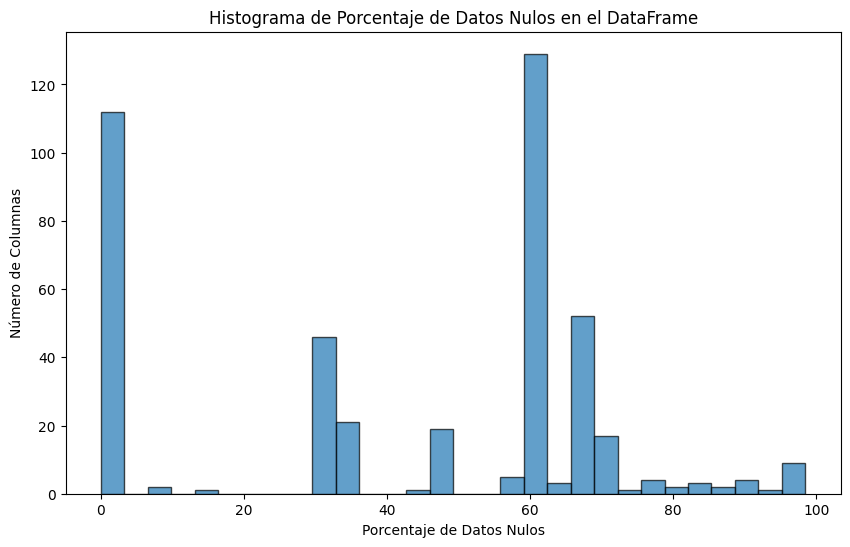

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(porcentaje_nulos, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Porcentaje de Datos Nulos')
plt.ylabel('Número de Columnas')
plt.title('Histograma de Porcentaje de Datos Nulos en el DataFrame')
plt.show()

**CONCLUSION**
* Existen un gran numero de columnas con porcentaje de datos nulos superior al 55%

* Encontrando columnas con datos nulos superiores al 70% para eliminarlas
* Encontrando columnas con datos nulos menores al 70% para imputarlos por la mediana

In [7]:
nulos_delete = []
nulos_imputer = []

for i in Train.columns:
    if (Train[i].isnull().sum() / len(Train) * 100) > 70:
        nulos_delete.append(i)
    elif (Train[i].isnull().sum() / len(Train) * 100) != 0:
        nulos_imputer.append(i)

print('Done!')



Done!


In [8]:
#Eliminamos columnas con mas de 70% de nulos
Train.drop(nulos_delete,axis=1,inplace=True) 

In [9]:
# nueva dimension del dataframe
Train.shape 

(99999, 393)

In [10]:
#Como vemos hay variables numericas y categoricas
Train[nulos_imputer]  

,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,gmail.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,outlook.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,yahoo.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,gmail.com,NaN,...,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,512.0,150.0,visa,226.0,debit,444.0,87.0,NaN,yahoo.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,545.0,185.0,visa,226.0,credit,NaN,NaN,NaN,gmail.com,gmail.com,...,507.0,New,NotFound,mobile safari uiwebview,F,F,F,T,mobile,NaN
99996,555.0,150.0,visa,226.0,debit,512.0,87.0,NaN,hotmail.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,111.0,150.0,visa,228.0,credit,441.0,87.0,NaN,NaN,gmail.com,...,161.0,Found,Found,chrome 63.0,T,F,T,T,desktop,MacOS


In [11]:
Train[nulos_imputer].dtypes

card2         float64
card3         float64
card4          object
card5         float64
card6          object
               ...   
id_36          object
id_37          object
id_38          object
DeviceType     object
DeviceInfo     object
Length: 318, dtype: object

In [12]:
#Separamos las variables numericas y categoricas a las que les vamos a aplicar la imputacion.
num_imputar=(Train[nulos_imputer].select_dtypes(include=['float64','int'])).columns 
cat_imputar=(Train[nulos_imputer].select_dtypes(include=['object'])).columns 

In [13]:
#Cantidad de nulos en las columnas numericas que debemos imputar
Train[num_imputar].isnull().sum() 

card2     1354
card3        3
card5      525
addr1     9037
addr2     9037
         ...  
id_13    66066
id_14    69664
id_17    60119
id_19    60128
id_20    60133
Length: 296, dtype: int64

In [14]:
#instanciamos el imputador, seleccionamos metodo 'Median'
from sklearn.impute import SimpleImputer
imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')  

In [15]:
#Aplicamos el imputador
Train[num_imputar]=imputer_median.fit_transform(Train[num_imputar]) 

In [16]:
#Verificamos ahora las columnas no deberían tener datos nulos.
Train[num_imputar].isnull().sum()

card2    0
card3    0
card5    0
addr1    0
addr2    0
        ..
id_13    0
id_14    0
id_17    0
id_19    0
id_20    0
Length: 296, dtype: int64

In [17]:
#Ahora imputemos los nulos de las columnas categoricas. Vamos a revisar rapidamente que hay en ellos.
Train[cat_imputar]

,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,...,id_16,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,discover,credit,NaN,NaN,T,T,T,M2,F,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotFound,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,visa,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,F,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,visa,credit,gmail.com,gmail.com,NaN,NaN,NaN,M2,NaN,NaN,...,NaN,New,NotFound,mobile safari uiwebview,F,F,F,T,mobile,NaN
99996,visa,debit,hotmail.com,NaN,NaN,NaN,NaN,M0,F,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,visa,credit,NaN,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,...,Found,Found,Found,chrome 63.0,T,F,T,T,desktop,MacOS


In [18]:
Train[cat_imputar].isnull().sum()/len(Train)*100

card4             0.007000
card6             0.004000
P_emaildomain    15.393154
R_emaildomain    65.453655
M1               68.553686
M2               68.553686
M3               68.553686
M4               57.669577
M5               68.923689
M6               45.587456
id_12            58.553586
id_15            59.598596
id_16            61.835618
id_28            59.598596
id_29            59.598596
id_31            59.757598
id_35            59.598596
id_36            59.598596
id_37            59.598596
id_38            59.598596
DeviceType       59.716597
DeviceInfo       63.534635
dtype: float64

* Para los datos categóricos, aquellos con mas de 60% de datos nulos, los eliminaremos, ya que estaríamos tomando decisiones con valores que en su mayoría son inciertos.

* Para aquellos con porcentaje pequeño, utilizaré la moda como imputador

In [19]:
cat_delete = []
cat_imputer = []

for i in cat_imputar :
    if (Train[i].isnull().sum() / len(Train) * 100) > 60:
        cat_delete.append(i)
    else :
        cat_imputer.append(i)

print('Done!')

Done!


In [20]:
#Elimino las columnas categoricas con mas del 60% nulos
Train.drop(cat_delete,axis=1, inplace=True) 

In [21]:
# A las restantes aplico la moda para imputar

imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')  
Train[cat_imputer] =imputer_mode.fit_transform(Train[cat_imputer])

In [22]:
#Verificamos la imputacion
Train[cat_imputer].isnull().sum()

card4            0
card6            0
P_emaildomain    0
M4               0
M6               0
id_12            0
id_15            0
id_28            0
id_29            0
id_31            0
id_35            0
id_36            0
id_37            0
id_38            0
DeviceType       0
dtype: int64

In [23]:
#Verificamos que ahora el dataframe no contiene valores nulos
Train.isnull().sum().sum()

0

In [24]:
Train.shape

(99999, 386)

## VISUALIZACIONES Y ESTADISTICA DESCRIPTIVA

In [25]:
Train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_01,id_02,id_05,id_06,id_11,id_13,id_14,id_17,id_19,id_20
count,9.999900e+04,99999.00000,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,3.036999e+06,0.02561,1.135115e+06,130.743579,9878.453325,371.106131,153.236612,200.208162,292.099771,86.310643,...,-6.383844,116157.055691,0.809788,-2.415164,99.870563,50.575016,-314.505445,170.872599,356.206462,387.965360
std,2.886737e+04,0.15797,5.733446e+05,206.025702,4933.557719,158.173664,11.151425,40.840823,98.333564,4.827878,...,8.757560,78774.103299,3.575495,10.744679,0.808040,6.274939,52.846069,17.271215,92.641599,98.036072
min,2.987000e+06,0.00000,8.640000e+04,0.292000,1001.000000,100.000000,100.000000,100.000000,100.000000,13.000000,...,-100.000000,1120.000000,-34.000000,-100.000000,90.000000,10.000000,-600.000000,100.000000,100.000000,100.000000
25%,3.012000e+06,0.00000,6.537475e+05,45.000000,6019.000000,219.000000,150.000000,166.000000,204.000000,87.000000,...,-5.000000,102450.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,166.000000,352.000000,391.000000
50%,3.036999e+06,0.00000,1.189336e+06,75.000000,9653.000000,387.000000,150.000000,226.000000,299.000000,87.000000,...,-5.000000,102450.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,166.000000,352.000000,391.000000
75%,3.061998e+06,0.00000,1.643436e+06,135.950000,14290.000000,514.000000,150.000000,226.000000,330.000000,87.000000,...,-5.000000,102450.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,166.000000,352.000000,391.000000
max,3.086998e+06,1.00000,2.006177e+06,4829.950000,18395.000000,600.000000,229.000000,237.000000,540.000000,102.000000,...,0.000000,999595.000000,52.000000,0.000000,100.000000,63.000000,720.000000,229.000000,671.000000,660.000000


In [26]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 386 entries, TransactionID to DeviceType
dtypes: float64(366), int64(4), object(16)
memory usage: 294.5+ MB


 ** *La Variable respuesta es 'isFraud' miremos su balance* **

In [27]:
Train['isFraud'].value_counts()

isFraud
0    97438
1     2561
Name: count, dtype: int64

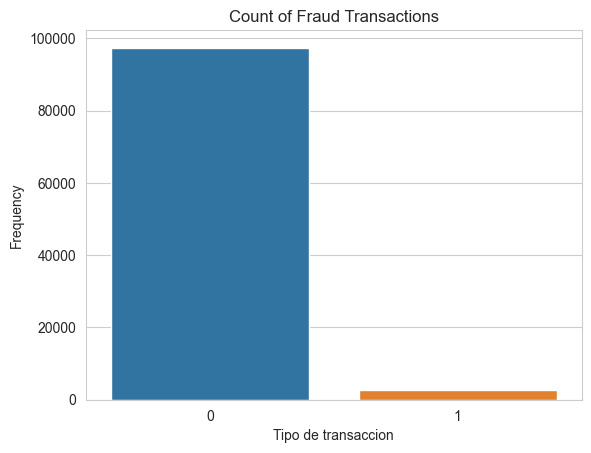

In [28]:
import seaborn as sns
sns.set_style("whitegrid")

plt.title('Count of Fraud Transactions')
sns.countplot(x=Train.isFraud)
plt.xlabel('Tipo de transaccion')
plt.ylabel('Frequency')
plt.show()

**INSIGTHS**

1. Las cases están fuertemente desbalanceadas. Los casos de la clase `0` *No fraude* corresponden a la gran mayoría de transacciones.
2. Debemos aplicar alguna técnica para compensar ese desbalance

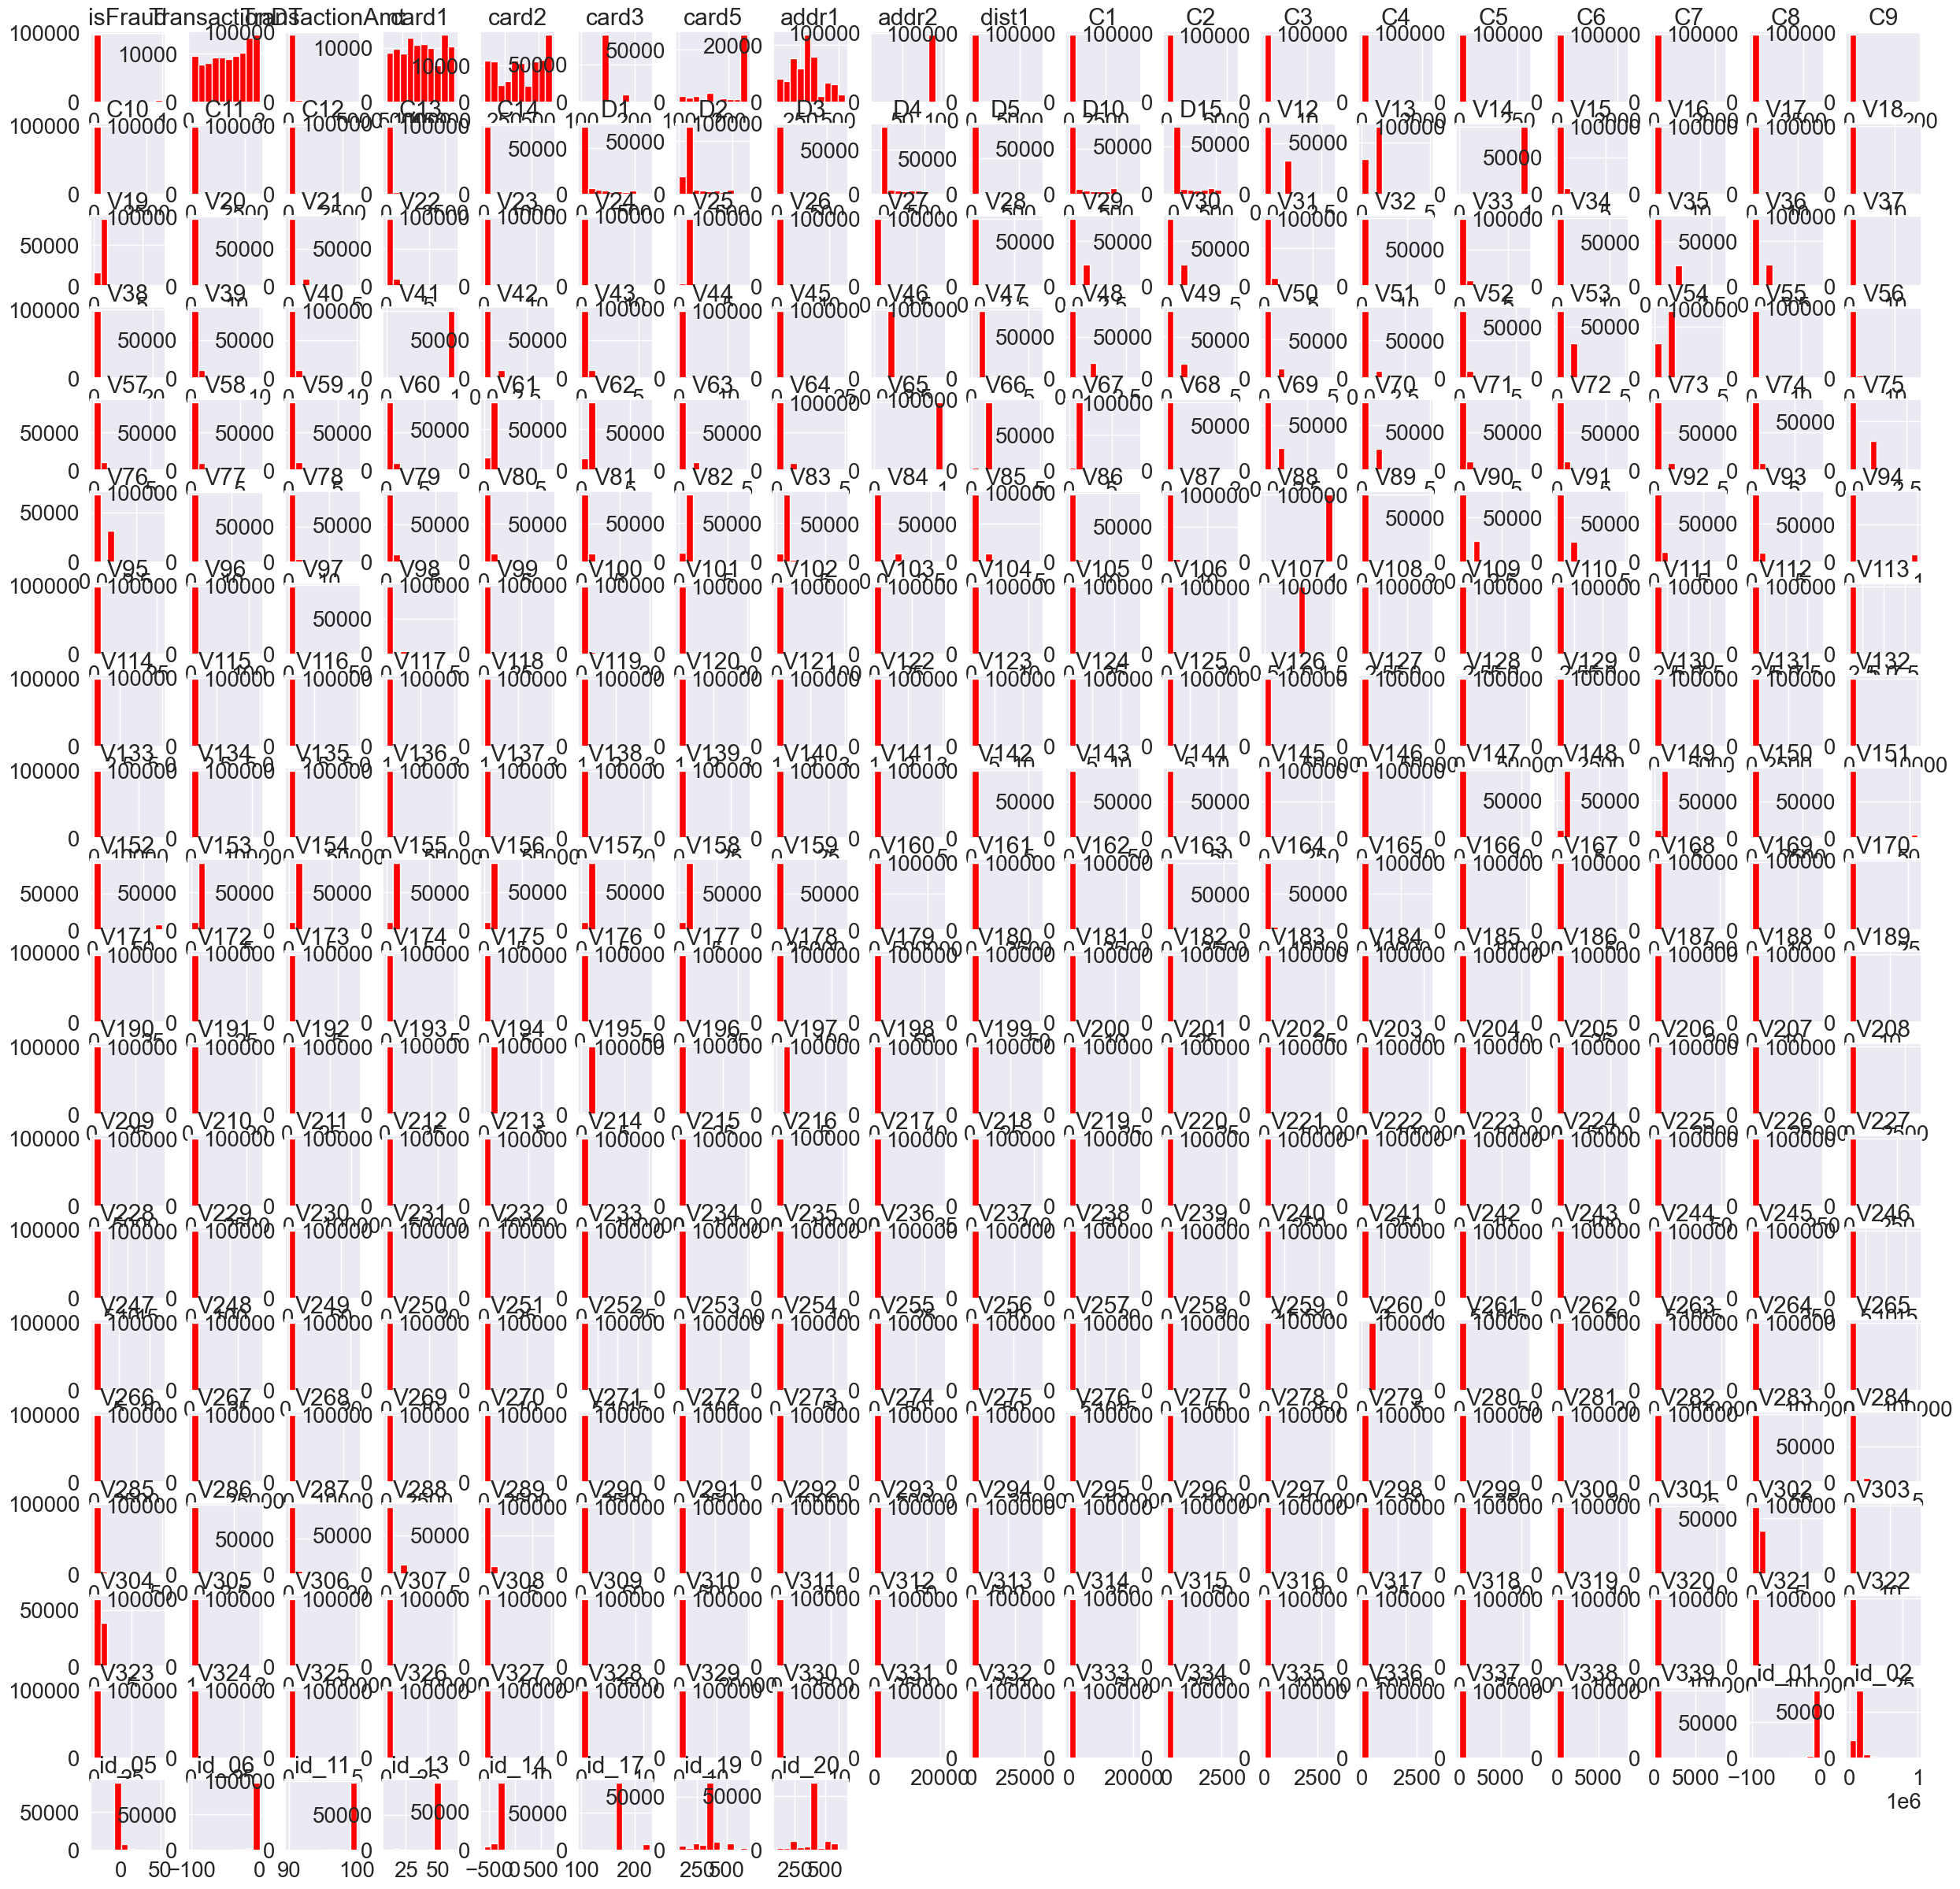

In [29]:
sns.set(font_scale=1.8)
Train.iloc[: , 1:].hist(figsize = (30,30), color = 'red');

In [30]:
#Voy a separar la variable objetivo en este momento
Target= Train['isFraud']
Train.drop('isFraud', axis=1, inplace=True)

In [ ]:
corr = (Train.select_dtypes(include=['float64','int'])).corr()
corr.shape

(369, 369)

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

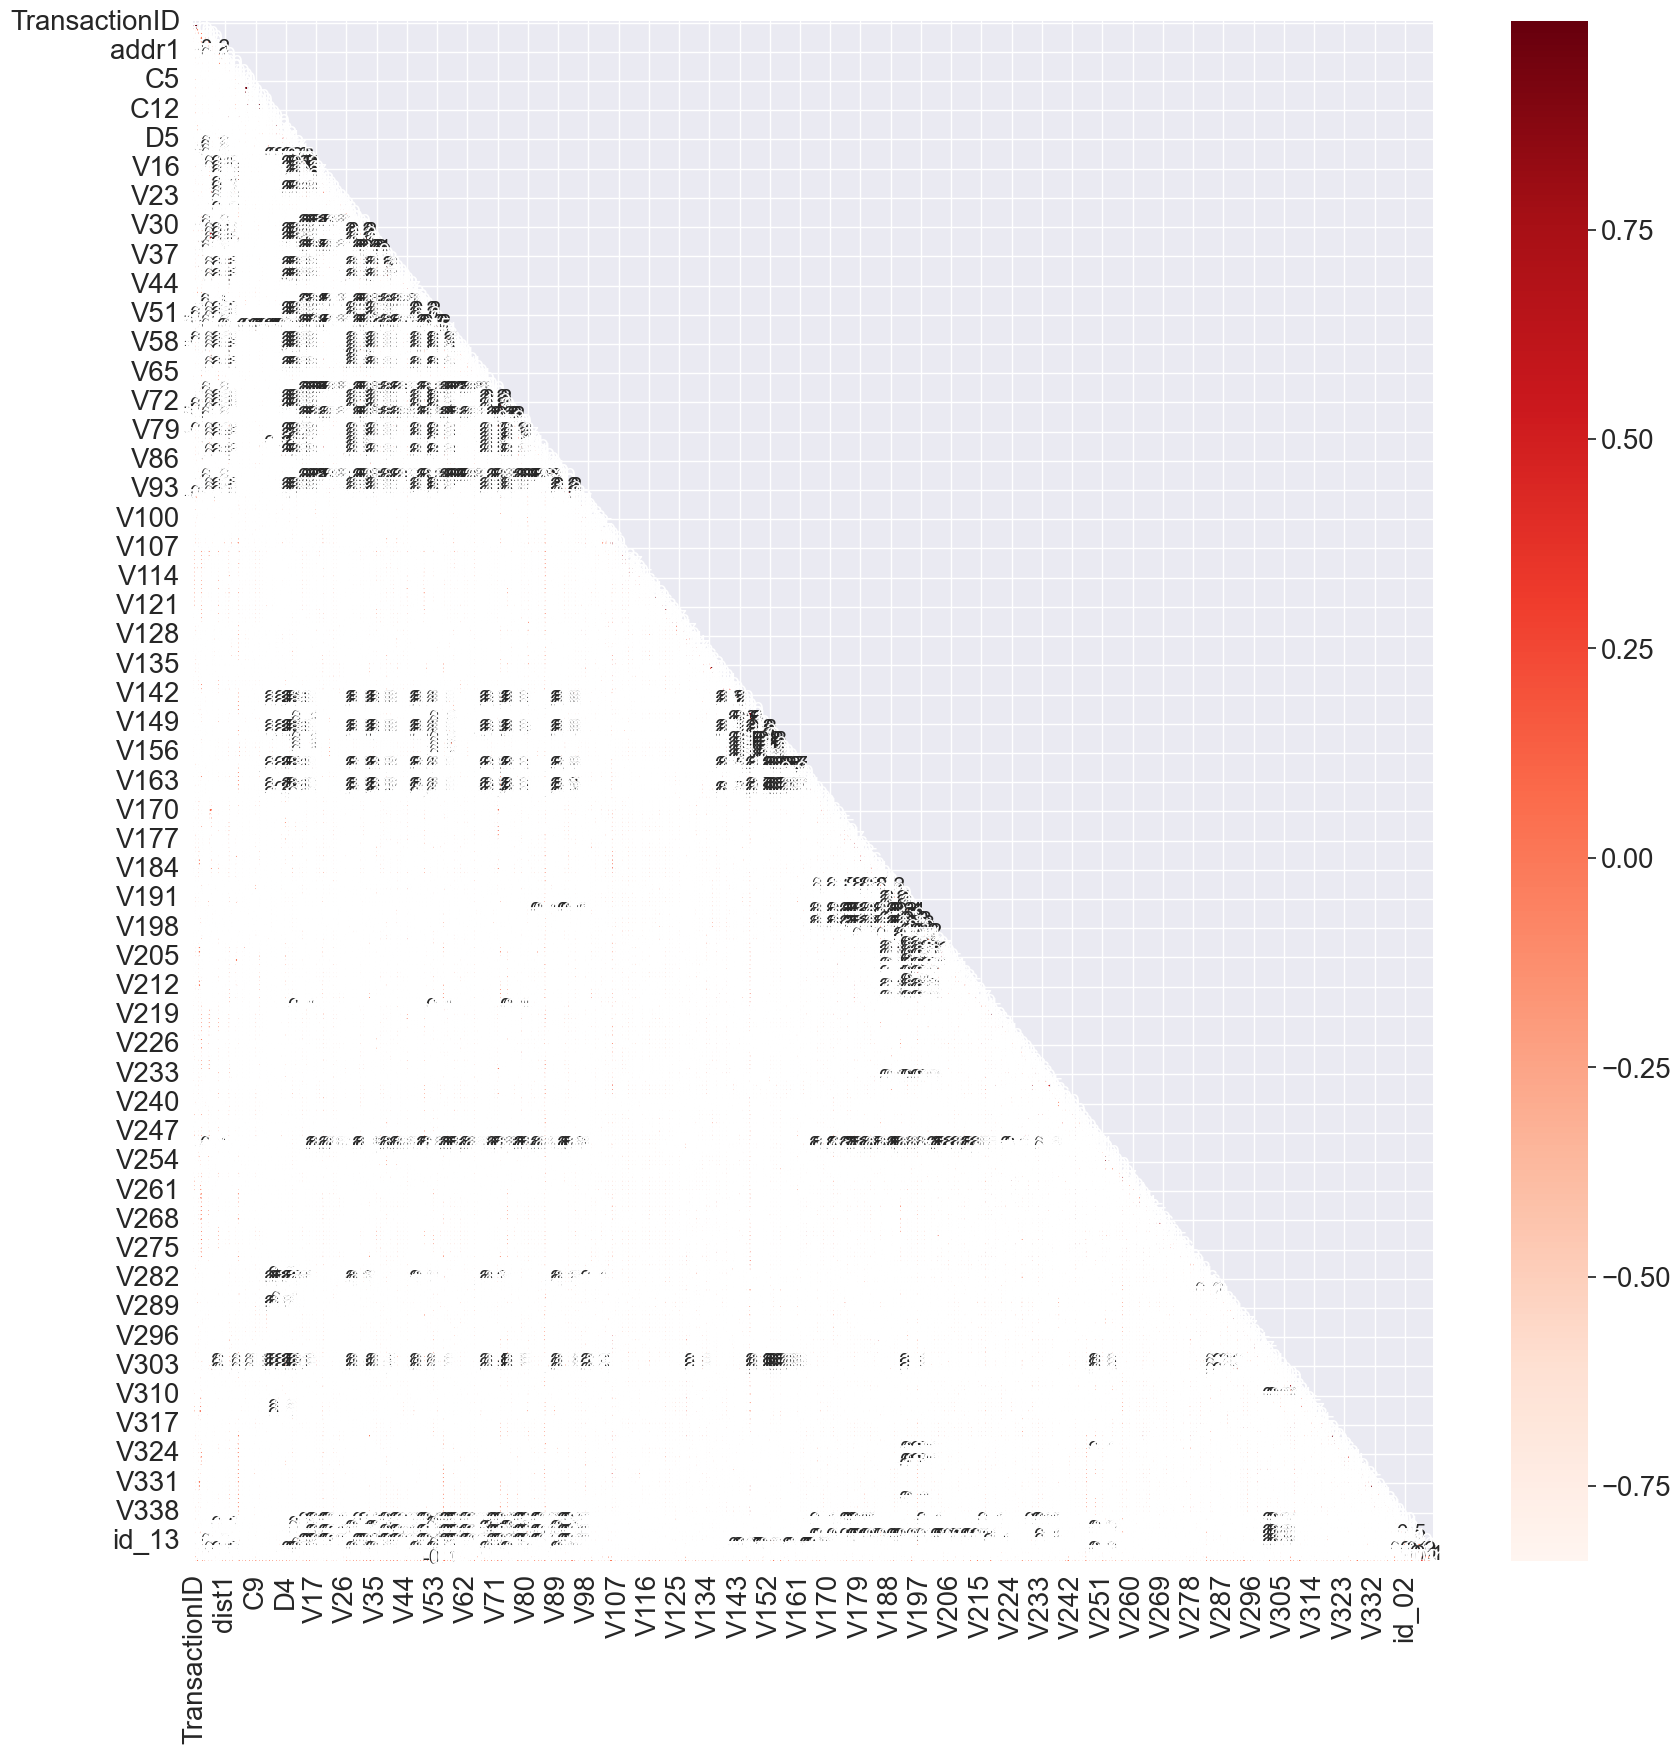

In [ ]:
sns.set(font_scale=1.8)
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, cbar=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds');

### IDENTIFICANDO COLUMNAS ALTAMENTE CORRELACIONADAS CON VIF

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
cat= Train.select_dtypes(include=['object']).columns
cat

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M4', 'M6', 'id_12',
       'id_15', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType'],
      dtype='object')

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
encoder = OneHotEncoder(drop='if_binary')

data= encoder.fit_transform(Train[cat])
df = pd.DataFrame(data.toarray())
df= pd.concat([Train, df], axis=1)

df.drop(cat, axis=1, inplace=True)


In [72]:
df

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,159,160,161,162,163,164,165,166,167,168
0,2987000,86400,68.500,13926,387.0,150.0,142.0,315.0,87.0,19.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2987001,86401,29.000,2755,404.0,150.0,102.0,325.0,87.0,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,2987002,86469,59.000,4663,490.0,150.0,166.0,330.0,87.0,287.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2987003,86499,50.000,18132,567.0,150.0,117.0,476.0,87.0,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2987004,86506,50.000,4497,514.0,150.0,102.0,420.0,87.0,9.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,3086994,2005980,97.000,14290,512.0,150.0,226.0,444.0,87.0,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
99995,3086995,2005989,55.385,2256,545.0,185.0,226.0,299.0,87.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
99996,3086996,2006074,117.000,2518,555.0,150.0,226.0,512.0,87.0,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
99997,3086997,2006135,50.000,2748,111.0,150.0,228.0,441.0,87.0,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
df.columns.tolist()

Revisando Multicolinealidad

In [78]:

# Calcular el VIF para cada columna y eliminar las que tienen VIF >= 5
for i in df.columns:
    VIF = variance_inflation_factor(df.values, df.columns.get_loc(i))
    if VIF >= 5:
        df.drop(i,axis=1, inplace=True)
        print("Se eliminó:", i, "su valor VIF fue", VIF)

Se eliminó: TransactionID su valor VIF fue 203.16175509749021
Se eliminó: C1 su valor VIF fue 2455.501372213679
Se eliminó: C2 su valor VIF fue 1708.2704723136137
Se eliminó: C4 su valor VIF fue 3935.9987997998383
Se eliminó: C5 su valor VIF fue 17.866381278964948
Se eliminó: C6 su valor VIF fue 3788.914656898333
Se eliminó: C7 su valor VIF fue 8030.9805844935645
Se eliminó: C8 su valor VIF fue 1937.2524474217132
Se eliminó: C9 su valor VIF fue 10.799607521251245
Se eliminó: C10 su valor VIF fue 265.03150804165614
Se eliminó: C11 su valor VIF fue 1229.218172959604
Se eliminó: C12 su valor VIF fue 19.24972282076757
Se eliminó: C13 su valor VIF fue 21.646208668593392
Se eliminó: D1 su valor VIF fue 20.06071480619551
Se eliminó: V12 su valor VIF fue 13.600873974293307
Se eliminó: V15 su valor VIF fue 362.0790506331016
Se eliminó: V16 su valor VIF fue 43.08188852368571
Se eliminó: V17 su valor VIF fue 156.29165996434762
Se eliminó: V18 su valor VIF fue 18.7150461087927
Se eliminó: V19 su v

KeyboardInterrupt: 

# EVALUANDO MODELOS DE CLASIFICACION - FRAUDE 

1. KNN
2. Ridge
3. Lasso
4. Naive Bayes
5. XGBoost
6. SVM
7. MLP

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df
y=Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=Target, random_state=66)

## Modelo KNN

In [ ]:
resultados = {}

In [ ]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

clf = KNeighborsClassifier()
param_grid = {'clf__n_neighbors': [5,10]}
pipe = make_pipeline(StandardScaler(), clf())
grid = GridSearchCV(pipe, param_grid, cv=5)

In [ ]:
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print("f1 score: {:.2f}".format(f1_score(y_test, y_train)))
print(classification_report(y_test, y_train, target_names=["not fraud", "fraud"]))
rf_auc = roc_auc_score(y_test, y_train)

In [ ]:
from sklearn.metrics import precision_score, recall_score


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

## MODELO RIDGE

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=0)
param_grid = {'ridge__alpha': [0.01, 1, 10],
              'max_iter':[200,500]}
pipe = make_pipeline(StandardScaler(), ridge(random_state=0))
grid = GridSearchCV(pipe, param_grid, cv=5)

In [ ]:
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

In [ ]:
resultados['Ridge'] = {
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    }

## Resultados de los modelos: